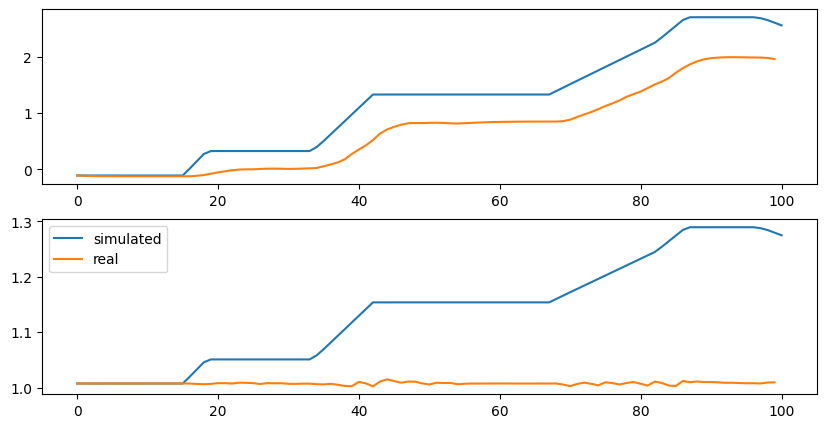

In [28]:
import pickle

from alrd.run_spot import SessionBuffer, DataBuffer, TransitionData, StateData, TimeData
from alrd.spot_gym.model.robot_state import SpotState

# load real data
real_data_path = "/home/bhoffman/Documents/MT FS24/active-learning-dynamics/collected_data/test20240730-174534/session_buffer.pickle"
with open(real_data_path, "rb") as file:
    real_data = pickle.load(file)

states = real_data.data_buffers[0].states
real_body_states = np.array([s.next_state.pose_of_body_in_vision for s in states])
real_ee_states = np.array([s.next_state.pose_of_hand_in_body for s in states])
real_arm_joint_positions = [s.next_state.arm_joint_positions for s in states]


# load simlauted trajectory data
file_path = "/home/bhoffman/Documents/MT FS24/active-learning-dynamics/alrd/spot_simulator/generated_trajectories/trajectory_20240731-165547.pickle"
with open(file_path, "rb") as file:
    data = pickle.load(file)

base_x = [d[0] for d in data]
base_y = [d[1] for d in data]
heading = [d[2] for d in data]
base_vx = [d[3] for d in data]
base_vy = [d[4] for d in data]
base_vrot = [d[5] for d in data]
ee_x = [d[6] for d in data]
ee_y = [d[7] for d in data]
ee_z = [d[8] for d in data]
ee_rx = [d[9] for d in data]
ee_ry = [d[10] for d in data]
ee_rz = [d[11] for d in data]
ee_vx = [d[12] for d in data]
ee_vy = [d[13] for d in data]
ee_vz = [d[14] for d in data]
ee_vrx = [d[15] for d in data]
ee_vry = [d[16] for d in data]
ee_vrz = [d[17] for d in data]
sh0 = [d[18] for d in data]
sh1 = [d[19] for d in data]
el0 = [d[20] for d in data]
el1 = [d[21] for d in data]
wr0 = [d[22] for d in data]
wr1 = [d[23] for d in data]

# plot
import matplotlib.pyplot as plt
import numpy as np

fig, axs = plt.subplots(2, 1, figsize=(10, 5))

axs[0].plot(base_x, label="simulated")
axs[0].plot(real_body_states[:100, 0], label="real")
axs[1].plot(ee_x, label="simulated")
axs[1].plot(real_ee_states[:100,0], label="real")
plt.legend()
plt.show()